# **Sentiment Analysis of Amazon Alexa Reviews**

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams["axes.labelsize"] = 15


In [3]:
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

In [4]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


# Explore Dataset

In [6]:
data['feedback'].value_counts() 

1    2893
0     257
Name: feedback, dtype: int64

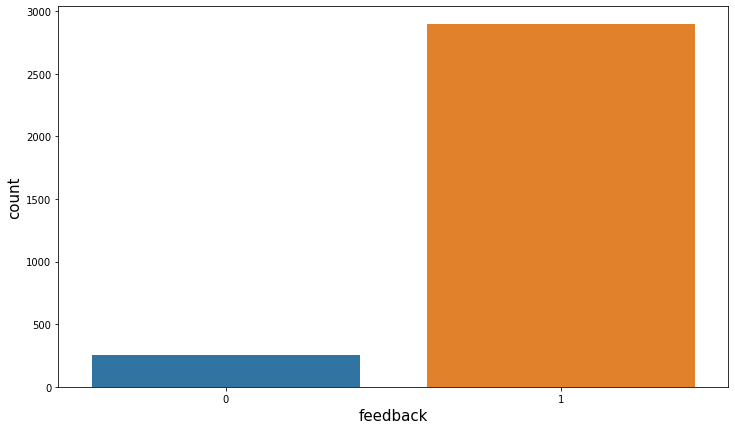

In [7]:
sns.countplot(data['feedback'])

* **In our data most reviews have positive feedback**

In [8]:
data['rating'].value_counts() 

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

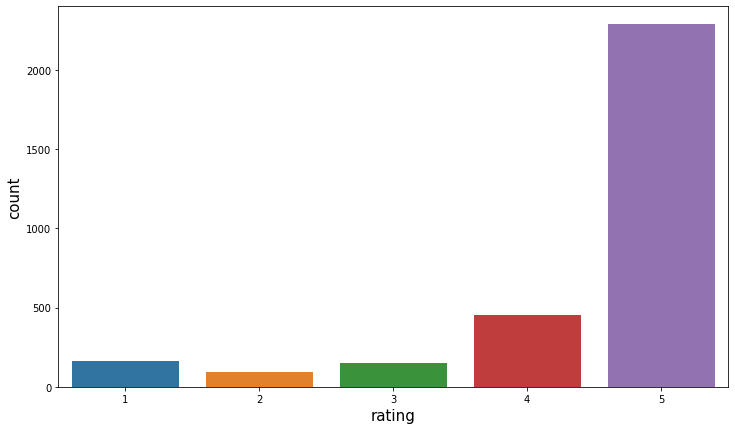

In [9]:
sns.countplot(data['rating'])

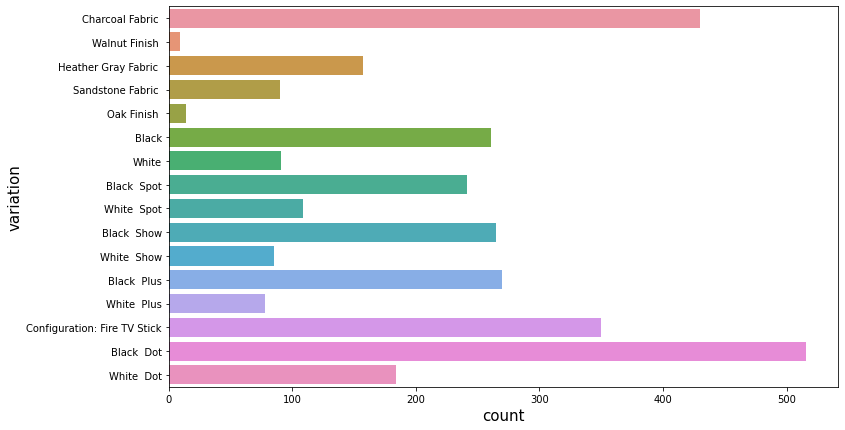

In [10]:
sns.countplot(y = data['variation'])

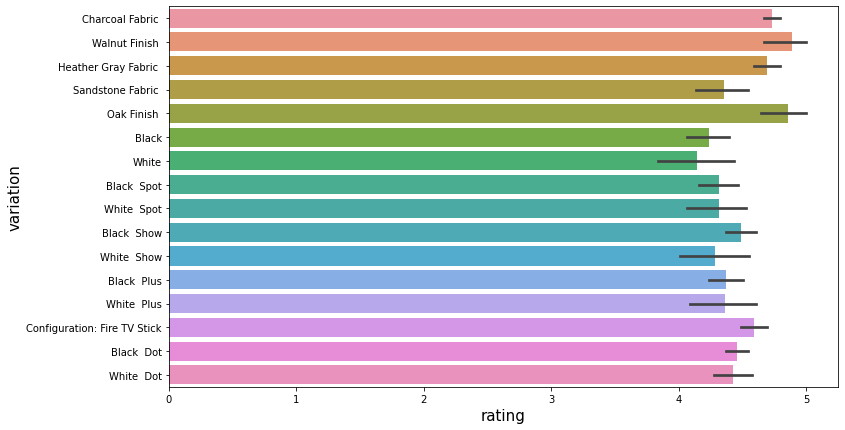

In [11]:
sns.barplot(x=data['rating'],  y=data['variation'])
plt.show()

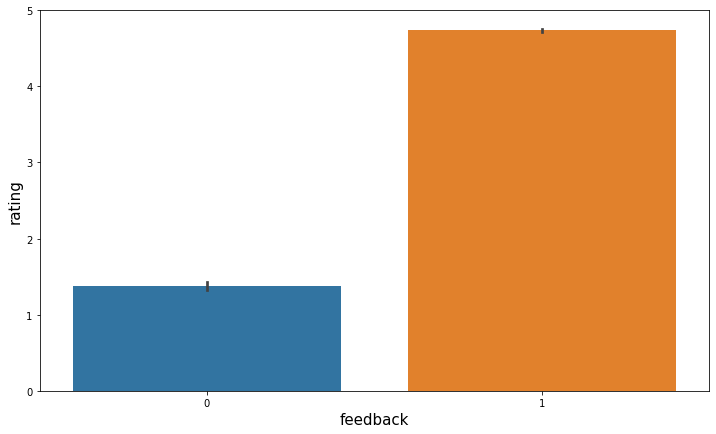

In [12]:
sns.barplot(x=data['feedback'],  y=data['rating'])
plt.yticks(ticks=(0, 1, 2, 3, 4, 5))
plt.show()

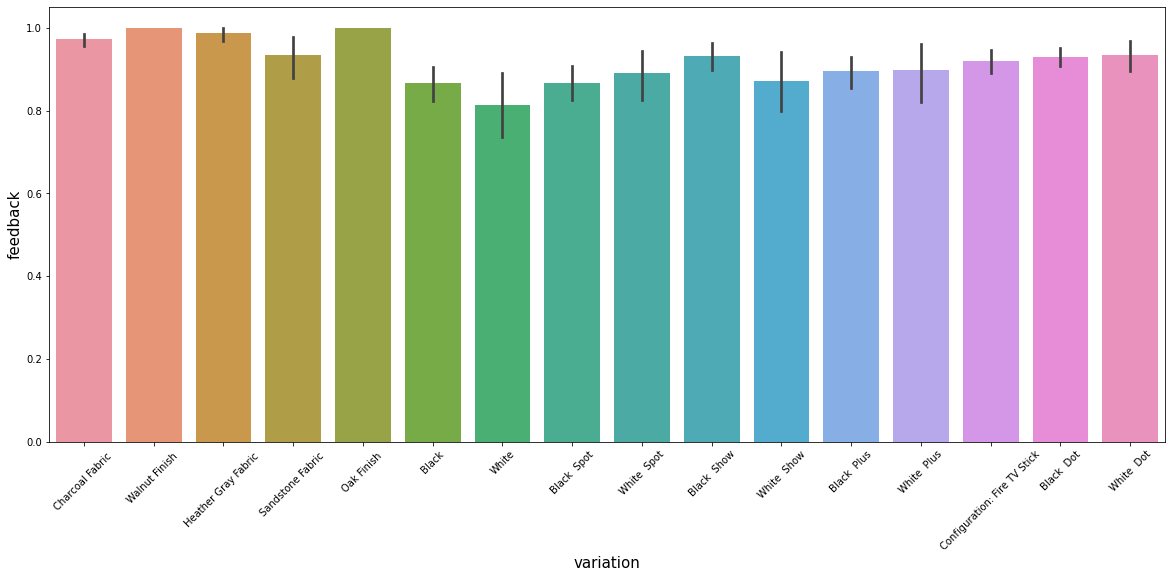

In [13]:
plt.figure(figsize=(20, 8))
sns.barplot(x=data['variation'],  y=data['feedback'])
plt.xticks(rotation=45)
plt.show()

In [14]:
#create new column named as len

data['len'] = data['verified_reviews'].apply(len)

In [15]:
data.head()

,rating,date,variation,verified_reviews,feedback,len
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [16]:
#review the maximum length review

data['len'].max()

2851

In [17]:
data[data['len']==2851]

,rating,date,variation,verified_reviews,feedback,len
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851


* **Interesting to say that the biggest review message is a positive feedback**

In [18]:
data[data['len']==2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [19]:
#shortest review

data['len'].min()

1

In [20]:
data[data['len']==1]['verified_reviews'].iloc[0]

'😍'

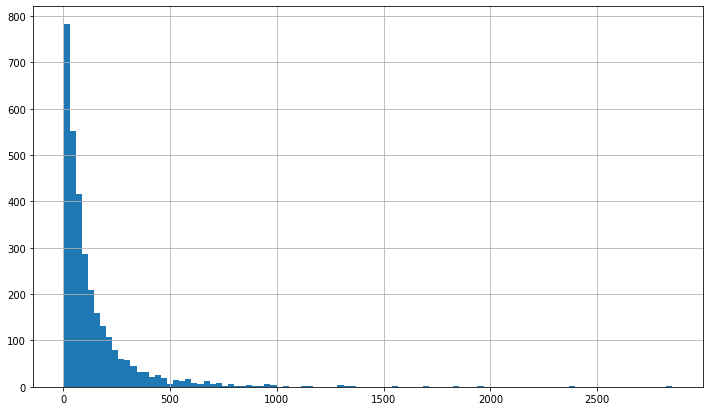

In [21]:
data['len'].hist(range=(1, 2851), bins=100)

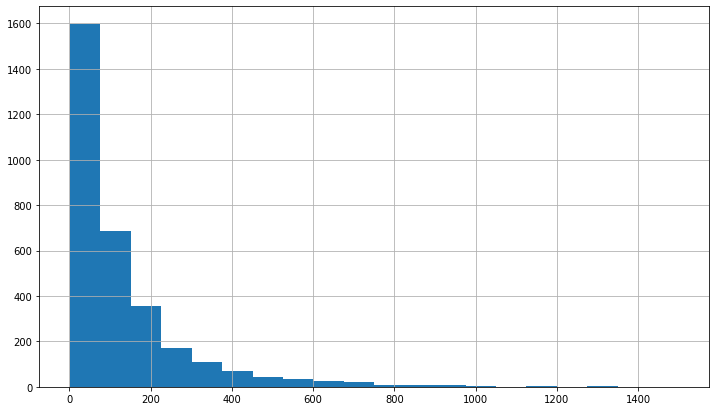

In [22]:
data['len'].hist(range=(1, 1500), bins=20)

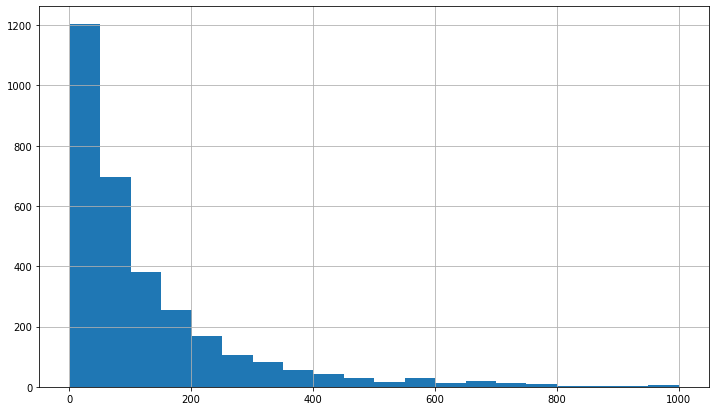

In [23]:
data['len'].hist(range=(1, 1000), bins=20)

* **Most reviews are between 1-100 length and then 101-200**

In [24]:
positive = data[data['feedback']==1]

In [25]:
negative = data[data['feedback']==0]

In [26]:
positive['len'].mean()

124.65917732457656

In [27]:
negative['len'].mean()

215.24124513618676

### All reviews to list

In [28]:
sentences = data['verified_reviews'].tolist()
#sentences

### Join senetences when find any space

In [29]:
sentences_n = " ".join(sentences)
#sentences_n

# Data Cleaning

In [30]:
data = data.drop(['date', 'rating', 'len'],axis=1)

In [31]:
variation_dummies = pd.get_dummies(data['variation'], drop_first = True)

In [32]:
data.drop(['variation'], axis=1, inplace=True)

In [33]:
data_n = pd.concat([data, variation_dummies], axis=1)

In [34]:
import nltk  

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import string

In [36]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [37]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [38]:
reviews_df_clean = data['verified_reviews'].apply(message_cleaning)

In [39]:
#cleaned

print(reviews_df_clean[0])

['Love', 'Echo']


In [40]:
#original

print(data['verified_reviews'][0])

Love my Echo!


# Tokenization (Count Vectorizer)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vectorizer = CountVectorizer(analyzer = message_cleaning)

In [43]:
X = vectorizer.fit_transform(data['verified_reviews']).toarray()

In [44]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [46]:
X.shape

(3150, 5211)

In [47]:
data_n = data_n.drop(['verified_reviews'], axis=1)

In [48]:
reviews = pd.DataFrame(X)

In [49]:
data_reviews = pd.concat([data_n, reviews], axis=1)

In [50]:
data_reviews

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X = data_reviews.drop(['feedback'] , axis=1)

In [53]:
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y = data_reviews['feedback']

In [54]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

# Train-Test Split

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train Naive Bayes Classifier Model

In [56]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Assess Model Performance

In [57]:
NB_classifier.score(X_test, y_test)

0.9365079365079365

In [59]:
predicted = NB_classifier.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
cm = confusion_matrix(y_test, predicted)

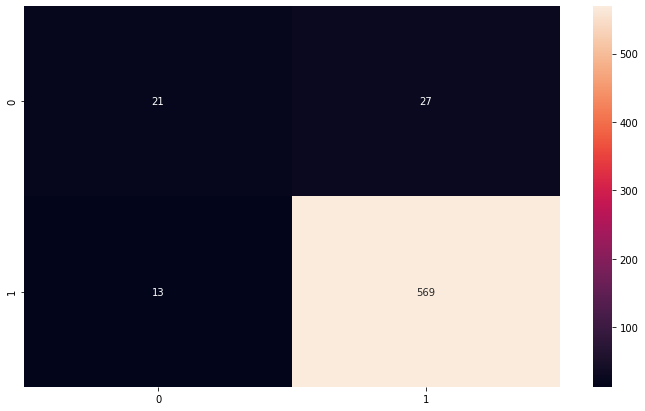

In [64]:
sns.heatmap(cm, annot=True, fmt='g')

In [65]:
cr = classification_report(y_test, predicted)

In [68]:
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.44      0.51        48
           1       0.95      0.98      0.97       582

    accuracy                           0.94       630
   macro avg       0.79      0.71      0.74       630
weighted avg       0.93      0.94      0.93       630

